In [1]:
import pandas as pd
import sqlite3
import os 
import numpy as np
"""Connect to the sql database"""
database_path = "crimes.db"
assert(os.path.exists(database_path)), "this notebook requires create_sql...py to have been run"
db = sqlite3.connect(database_path)
cur = db.cursor()
"""Read to dataframe"""
df = pd.read_sql("""SELECT * 
                FROM crimes
                WHERE "LSOA_name" LIKE 'Barnet%'
                AND "Crime_type" LIKE 'Burglary'""", con=db)
cur.close()
df


Crime_ID    Month  \
0                                                         2010-12   
1                                                         2010-12   
2                                                         2010-12   
3                                                         2010-12   
4                                                         2010-12   
...                                                  ...      ...   
44187  fda0870be993d2c9352ae14a540bf529c15a7aa9d92a4e...  2023-03   
44188  c6c2d9a772695865f4ca33fce59c26c48fe3a1cdac8c22...  2023-03   
44189  e5bab2bd4f31de44515dbf125b85284392d0349139a1d3...  2023-03   
44190  823465427f8764e250a48312715a4bd87e8012412046c6...  2023-03   
44191  50b5bbf4987109ee189f8a736ec7e92365b25169b7f783...  2023-03   

                       Reported_by                 Falls_within  Longitude  \
0      Metropolitan Police Service  Metropolitan Police Service  -0.201877   
1      Metropolitan Police Service  Metropolitan Police Service  -0.207853   
2      Metropolitan Police Service  Metropolitan Police Service  -0.202510   
3      Metropolitan Police Service  Metropolitan Police Service  -0.206779   
4      Metropolitan Police Service  Metropolitan Police Service  -0.209537   
...                            ...                          ...        ...   
44187  Metropolitan Police Service  Metropolitan Police Service  -0.202163   
44188  Metropolitan Police Service  Metropolitan Police Service  -0.202163   
44189  Metropolitan Police Service  Metropolitan Police Service  -0.197843   
44190  Metropolitan Police Service  Metropolitan Police Service  -0.199449   
44191  Metropolitan Police Service  Metropolitan Police Service  -0.197843   

        Latitude                  Location  LSOA_code    LSOA_name Crime_type  \
0      51.655538    On or near High Street  E01000248  Barnet 001A   Burglary   
1      51.654317     On or near The Avenue  E01000248  Barnet 001A   Burglary   
2      51.656348     On or near Bruce Road  E01000248  Barnet 001A   Burglary   
3      51.654768      On or near The Drive  E01000248  Barnet 001A   Burglary   
4      51.655223  On or near Marriott Road  E01000249  Barnet 001B   Burglary   
...          ...                       ...        ...          ...        ...   
44187  51.559100   On or near Hocroft Road  E01000139  Barnet 041B   Burglary   
44188  51.559100   On or near Hocroft Road  E01000139  Barnet 041B   Burglary   
44189  51.561093    On or near Church Walk  E01000140  Barnet 041C   Burglary   
44190  51.563896  On or near Llanelly Road  E01000140  Barnet 041C   Burglary   
44191  51.561093    On or near Church Walk  E01000140  Barnet 041C   Burglary   

      Last_outcome_category Context  
0                                    
1                                    
2                                    
3                                    
4                                    
...                     ...     ...  
44187   Under investigation          
44188   Under investigation          
44189   Under investigation          
44190   Under investigation          
44191   Under investigation          

[44192 rows x 12 columns]

In [2]:
LSOA_list = df["LSOA_code"].unique()

df_LSOA_per_month = pd.DataFrame(LSOA_list,columns=["LSOA"]).set_index("LSOA")
df_LSOA_per_month

Empty DataFrame
Columns: []
Index: [E01000248, E01000249, E01000254, E01000292, E01000293, E01000167, E01000251, E01000252, E01000166, E01000168, E01000169, E01000285, E01000289, E01000291, E01000267, E01000268, E01000270, E01000170, E01000171, E01000173, E01000174, E01000228, E01000253, E01000280, E01000286, E01000290, E01000271, E01000272, E01000273, E01000282, E01000116, E01000120, E01000122, E01000117, E01000118, E01000121, E01000123, E01000124, E01000266, E01000274, E01000320, E01000322, E01000275, E01000277, E01000283, E01000284, E01000321, E01000229, E01000230, E01000231, E01000232, E01000233, E01000186, E01000187, E01000188, E01000189, E01000190, E01000191, E01000158, E01000159, E01000160, E01000161, E01000162, E01000324, E01000256, E01000258, E01000263, E01000264, E01000255, E01000257, E01000261, E01000262, E01000193, E01000194, E01000226, E01000227, E01000299, E01000302, E01000317, E01000318, E01000323, E01000278, E01000301, E01000303, E01000304, E01000130, E01000234, E01000235, E01000156, E01000157, E01000163, E01000164, E01000315, E01000197, E01000295, E01000296, E01000298, E01000131, E01000134, E01000199, ...]

[211 rows x 0 columns]

In [3]:
months = np.array(df["Month"].unique())
months.sort()
for cur_month in months:
    df_month  = df[df["Month"] == cur_month].copy()
    
    # prevent counting same crime id twice
    df_month = df_month[["LSOA_code", "Crime_ID"]].drop_duplicates().groupby("LSOA_code").count()
    df_month = df_month.reindex(LSOA_list).fillna(0)
    df_month = df_month.rename(columns={"Crime_ID": cur_month})
    
    df_LSOA_per_month[cur_month] = df_month
    


df_LSOA_per_month = df_LSOA_per_month.reindex(sorted(df_LSOA_per_month.columns), axis=1).sort_index()
df_LSOA_per_month

C:\Users\dorus_000\AppData\Local\Temp\ipykernel_9452\778233169.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_LSOA_per_month[cur_month] = df_month
C:\Users\dorus_000\AppData\Local\Temp\ipykernel_9452\778233169.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_LSOA_per_month[cur_month] = df_month
C:\Users\dorus_000\AppData\Local\Temp\ipykernel_9452\778233169.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

2010-12  2011-01  2011-02  2011-03  2011-04  2011-05  2011-06  \
LSOA                                                                       
E01000115      0.0      1.0      0.0      0.0      1.0      0.0      0.0   
E01000116      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
E01000117      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
E01000118      1.0      0.0      1.0      1.0      1.0      1.0      0.0   
E01000119      0.0      1.0      1.0      0.0      0.0      1.0      1.0   
...            ...      ...      ...      ...      ...      ...      ...   
E01000322      1.0      1.0      1.0      1.0      0.0      1.0      1.0   
E01000323      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
E01000324      1.0      1.0      1.0      0.0      1.0      1.0      1.0   
E01033572      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
E01033573      0.0      0.0      1.0      1.0      0.0      1.0      1.0   

           2011-07  2011-08  2011-09  ...  2022-06  2022-07  2022-08  2022-09  \
LSOA                                  ...                                       
E01000115      0.0      1.0      0.0  ...      0.0      0.0      0.0      3.0   
E01000116      1.0      1.0      0.0  ...      0.0      0.0      0.0      1.0   
E01000117      1.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
E01000118      1.0      1.0      0.0  ...      0.0      1.0      0.0      2.0   
E01000119      1.0      0.0      1.0  ...      1.0      0.0      1.0      1.0   
...            ...      ...      ...  ...      ...      ...      ...      ...   
E01000322      1.0      1.0      1.0  ...      0.0      2.0      0.0      1.0   
E01000323      1.0      1.0      1.0  ...      1.0      0.0      0.0      0.0   
E01000324      1.0      1.0      1.0  ...      0.0      0.0      0.0      0.0   
E01033572      1.0      1.0      0.0  ...      0.0      4.0      4.0      2.0   
E01033573      1.0      0.0      1.0  ...      6.0      7.0      2.0      5.0   

           2022-10  2022-11  2022-12  2023-01  2023-02  2023-03  
LSOA                                                             
E01000115      1.0      0.0      0.0      1.0      0.0      3.0  
E01000116      2.0      0.0      0.0      0.0      2.0      1.0  
E01000117      1.0      0.0      1.0      1.0      1.0      1.0  
E01000118      0.0      1.0      0.0      1.0      0.0      2.0  
E01000119      0.0      0.0      0.0      0.0      1.0      0.0  
...            ...      ...      ...      ...      ...      ...  
E01000322      0.0      2.0      2.0      0.0      2.0      1.0  
E01000323      1.0      4.0      0.0      0.0      0.0      0.0  
E01000324      4.0      2.0      0.0      1.0      0.0      0.0  
E01033572      0.0      0.0      1.0      1.0      4.0      4.0  
E01033573      2.0      1.0      3.0      1.0      0.0      0.0  

[211 rows x 148 columns]

In [4]:
XY_df = df_LSOA_per_month.T
XY_df

LSOA     E01000115  E01000116  E01000117  E01000118  E01000119  E01000120  \
2010-12        0.0        1.0        1.0        1.0        0.0        1.0   
2011-01        1.0        1.0        1.0        0.0        1.0        1.0   
2011-02        0.0        1.0        1.0        1.0        1.0        1.0   
2011-03        0.0        1.0        1.0        1.0        0.0        0.0   
2011-04        1.0        1.0        1.0        1.0        0.0        0.0   
...            ...        ...        ...        ...        ...        ...   
2022-11        0.0        0.0        0.0        1.0        0.0        0.0   
2022-12        0.0        0.0        1.0        0.0        0.0        0.0   
2023-01        1.0        0.0        1.0        1.0        0.0        0.0   
2023-02        0.0        2.0        1.0        0.0        1.0        0.0   
2023-03        3.0        1.0        1.0        2.0        0.0        1.0   

LSOA     E01000121  E01000122  E01000123  E01000124  ...  E01000317  \
2010-12        1.0        1.0        1.0        1.0  ...        1.0   
2011-01        1.0        1.0        1.0        1.0  ...        1.0   
2011-02        1.0        1.0        1.0        1.0  ...        1.0   
2011-03        0.0        1.0        1.0        1.0  ...        0.0   
2011-04        1.0        1.0        1.0        1.0  ...        1.0   
...            ...        ...        ...        ...  ...        ...   
2022-11        1.0        0.0        1.0        1.0  ...        0.0   
2022-12        0.0        0.0        3.0        1.0  ...        0.0   
2023-01        1.0        0.0        0.0        3.0  ...        2.0   
2023-02        0.0        0.0        0.0       10.0  ...        0.0   
2023-03        0.0        0.0        2.0        3.0  ...        0.0   

LSOA     E01000318  E01000319  E01000320  E01000321  E01000322  E01000323  \
2010-12        1.0        1.0        1.0        1.0        1.0        1.0   
2011-01        1.0        1.0        1.0        1.0        1.0        1.0   
2011-02        1.0        1.0        1.0        1.0        1.0        1.0   
2011-03        0.0        0.0        0.0        0.0        1.0        1.0   
2011-04        1.0        1.0        1.0        1.0        0.0        1.0   
...            ...        ...        ...        ...        ...        ...   
2022-11        3.0        0.0        0.0        0.0        2.0        4.0   
2022-12        2.0        2.0        1.0        2.0        2.0        0.0   
2023-01        1.0        1.0        0.0        0.0        0.0        0.0   
2023-02        2.0        1.0        1.0        0.0        2.0        0.0   
2023-03        1.0        1.0        2.0        1.0        1.0        0.0   

LSOA     E01000324  E01033572  E01033573  
2010-12        1.0        1.0        0.0  
2011-01        1.0        1.0        0.0  
2011-02        1.0        1.0        1.0  
2011-03        0.0        1.0        1.0  
2011-04        1.0        1.0        0.0  
...            ...        ...        ...  
2022-11        2.0        0.0        1.0  
2022-12        0.0        1.0        3.0  
2023-01        1.0        1.0        1.0  
2023-02        0.0        4.0        0.0  
2023-03        0.0        4.0        0.0  

[148 rows x 211 columns]

In [5]:
D = XY_df.to_numpy()
D

array([[0., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 0., 1., ..., 1., 1., 1.],
       [0., 2., 1., ..., 0., 4., 0.],
       [3., 1., 1., ..., 0., 4., 0.]])

In [6]:
n_neighborhoods = D.shape[1]  # Number of neighborhoods
n_months = D.shape[0]  # Number of months

# Predicting Burglaries per LSOA
Predicting only number of burglaries per LSOA. Using: VAR

In [7]:
import statsmodels.api as sm

train_data = D[:n_months-1, :]
test_data = D[n_months-1, :]

# Fit the VAR model
model = sm.tsa.VAR(train_data)
model_fit = model.fit()

# Predict the next month's events for each neighborhood
prediction = model_fit.forecast(train_data, steps=1)
prediction[prediction < 0] = 0 # lower bound since negative doesn't make any sense

In [8]:
df_predicted = pd.DataFrame(prediction, columns=XY_df.columns).reset_index()
df_predicted["index"] = "predicted"
df_predicted = df_predicted.set_index("index").T
df_predicted["real"] = test_data
df_predicted

index      predicted  real
LSOA                      
E01000115   1.813252   3.0
E01000116   2.069715   1.0
E01000117   2.694718   1.0
E01000118   0.000000   2.0
E01000119   1.258256   0.0
...              ...   ...
E01000322   1.370672   1.0
E01000323   0.665869   0.0
E01000324   0.000000   0.0
E01033572   1.524109   4.0
E01033573   2.526598   0.0

[211 rows x 2 columns]

In [9]:
difference = np.array(test_data.reshape((211))) - np.array(prediction.reshape((211)))
difference.std()


1.7539728580937466

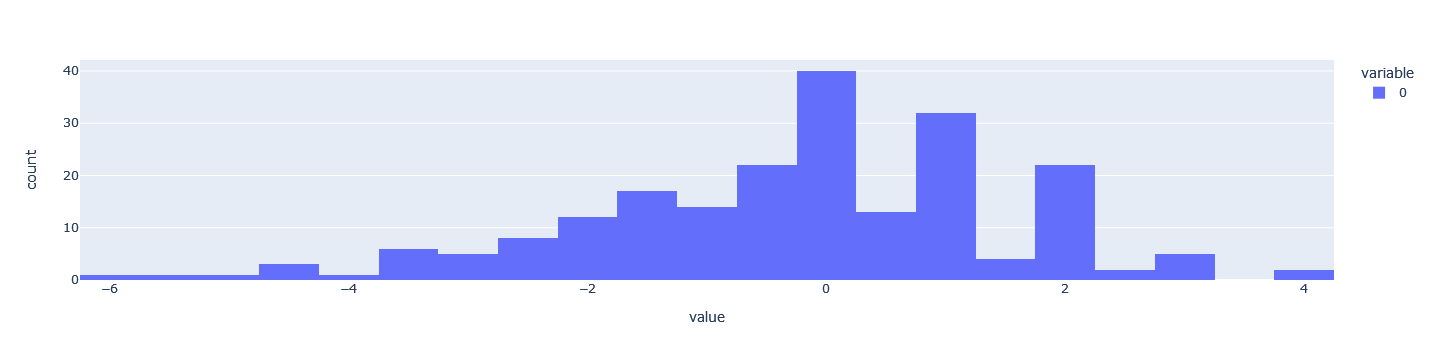

In [10]:
import plotly.express as px
px.histogram(difference.T)

In [11]:
np.mean((test_data - prediction)**2)


3.1226922687055345

# Predicting Burglaries geographically

Using Kernel Density Aproximation to predict the location of burglaries.
It does not allow for predicting the amount, and as of yet does not account for different date when sampling. Only when fitting

In [12]:
# https://dl.acm.org/doi/fullHtml/10.1145/3450287#sec-15
# kernel density estimation

from scipy import stats
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

In [13]:
import datetime
df["Date"] = pd.to_datetime(df["Month"])
df["month_int"] = df["Date"].dt.month
df["month_int"]

0        12
1        12
2        12
3        12
4        12
         ..
44187     3
44188     3
44189     3
44190     3
44191     3
Name: month_int, Length: 44192, dtype: int64

In [14]:
df_train = df[df["Date"] < "2023-03"]
df_test  = df[df["Date"] >= "2023-03"]


In [15]:
X = df_train[["Latitude", "Longitude"]].to_numpy()
Y = df_test[["Latitude", "Longitude"]].to_numpy()
X

array([[51.655538, -0.201877],
       [51.654317, -0.207853],
       [51.656348, -0.20251 ],
       ...,
       [51.559805, -0.208901],
       [51.558997, -0.208948],
       [51.558997, -0.208948]])

In [16]:
from sklearn.neighbors import KernelDensity
import numpy as np

# todo check bandwiths
kde_gaussian = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(X)
print("own score: ", kde_gaussian.score_samples(X).mean())
print("test score: ", kde_gaussian.score_samples(Y).mean())

from sklearn.neighbors import KernelDensity
import numpy as np

# todo check bandwiths
kde_tophat = KernelDensity(kernel='tophat', bandwidth=0.01).fit(X)
print("own score: ", kde_tophat.score_samples(X).mean())
print("test score: ", kde_tophat.score_samples(Y).mean())


own score:  4.523819989013325
test score:  4.530752735257369
own score:  4.6528883571505375
test score:  4.628159108600009


In [17]:
sample = kde_gaussian.sample(len(Y), random_state=0)
sample2 = kde_tophat.sample(len(Y), random_state=0)
print(((Y[:, :1] - sample[:, :1]) ** 2).mean())
print(((Y[:, :1] - sample2[:, :1]) ** 2).mean())

0.0013166242900394837
0.001249078325572153


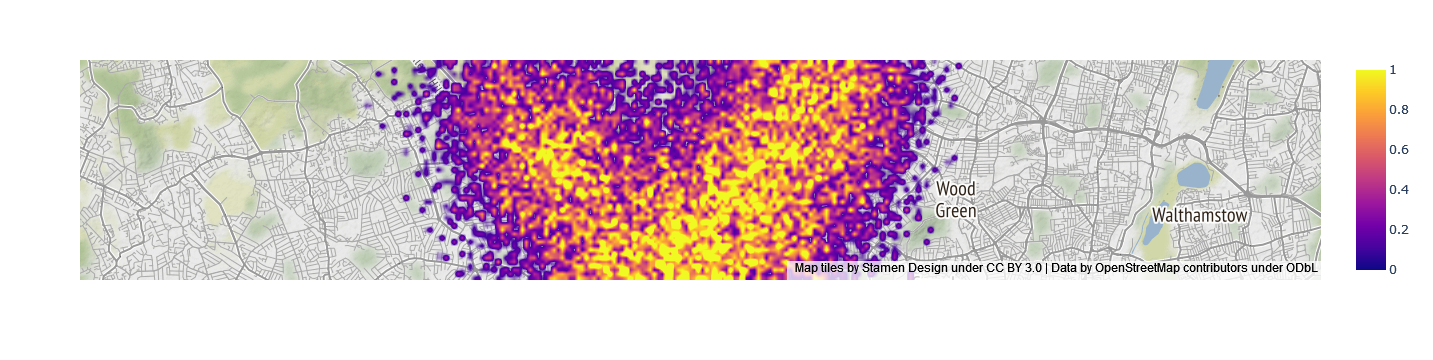

In [18]:
density_sample1 = kde_gaussian.sample(20000, random_state=0)
fig = px.density_mapbox(lat=density_sample1[:, 0], lon=density_sample1[:, 1], 
                        radius=4,
                        zoom = 11,
                        mapbox_style="stamen-terrain")
fig.show()

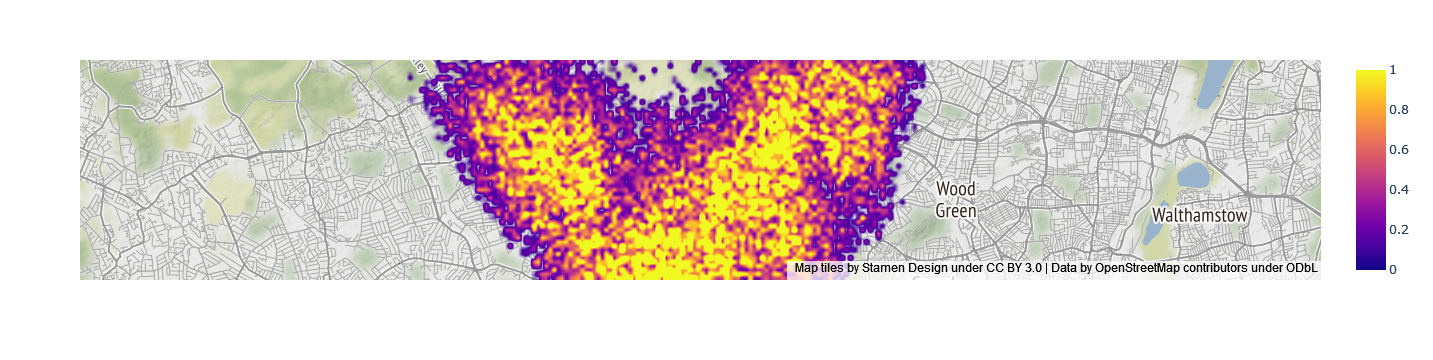

In [19]:
density_sample2 = kde_tophat.sample(20000, random_state=0)
fig2 = px.density_mapbox(lat=density_sample2[:, 0], lon=density_sample2[:, 1],
                         radius=4
                        , zoom = 11,
                        mapbox_style="stamen-terrain")
fig2.show()

In [20]:
# todo check bandwiths

# Comparing models based on resulting officer placements 1. LSOA based

In [21]:
officer_count = 50

In [22]:
D = XY_df.to_numpy()
n_neighborhoods = D.shape[1]  # Number of neighborhoods
n_months = D.shape[0]  # Number of months

train_data = D[:n_months-1, :]
test_data = D[n_months-1, :]

officer_placements = pd.DataFrame(columns=XY_df.columns)
officer_placements

Empty DataFrame
Columns: [E01000115, E01000116, E01000117, E01000118, E01000119, E01000120, E01000121, E01000122, E01000123, E01000124, E01000125, E01000126, E01000127, E01000128, E01000129, E01000130, E01000131, E01000132, E01000133, E01000134, E01000135, E01000136, E01000137, E01000138, E01000139, E01000140, E01000141, E01000142, E01000143, E01000144, E01000145, E01000146, E01000147, E01000148, E01000150, E01000151, E01000152, E01000153, E01000154, E01000155, E01000156, E01000157, E01000158, E01000159, E01000160, E01000161, E01000162, E01000163, E01000164, E01000165, E01000166, E01000167, E01000168, E01000169, E01000170, E01000171, E01000172, E01000173, E01000174, E01000175, E01000176, E01000177, E01000178, E01000179, E01000180, E01000181, E01000182, E01000183, E01000184, E01000185, E01000186, E01000187, E01000188, E01000189, E01000190, E01000191, E01000192, E01000193, E01000194, E01000195, E01000196, E01000197, E01000198, E01000199, E01000200, E01000201, E01000202, E01000203, E01000204, E01000205, E01000206, E01000207, E01000208, E01000209, E01000210, E01000211, E01000212, E01000213, E01000214, E01000215, ...]
Index: []

[0 rows x 211 columns]

In [23]:
def prediction_to_placements_argmax(prediction):
    prediction = np.array(prediction).flatten()
    argsort = np.argsort(prediction)
    placement_indexes = argsort[-officer_count:]
    placement = np.empty(prediction.shape).astype(int) # empty array of same size as prediction, reprsenting each LSOA
    placement[:] = 0
    placement[placement_indexes] = 1
    
    assert(int(placement.sum()) == officer_count)    
    
    return placement
    
def prediction_to_placements_proportional(prediction):

    predicted_amount_of_burglaries = (prediction.sum())
    officers_per_burglary = officer_count/predicted_amount_of_burglaries
    officers_per_LSOA     = officer_count/n_neighborhoods

    proportional_placement = ((prediction/predicted_amount_of_burglaries) * officer_count).copy().flatten()

    placement = np.empty(prediction.shape).astype(int).flatten() # empty array of same size as prediction, reprsenting each LSOA
    placement[:] = 0
    
    M = proportional_placement.mean()

    while placement.sum() < officer_count:
        greatest_idx = proportional_placement.argmax()
        placement[greatest_idx] += 1
        proportional_placement[greatest_idx] -= M

    assert(int(placement.sum()) == officer_count)    
    
    return placement
    

In [24]:
# VAR
import statsmodels.api as sm

# Fit the VAR model
model = sm.tsa.VAR(train_data)
model_fit = model.fit()

# Predict the next month's events for each neighborhood
prediction = model_fit.forecast(train_data, steps=1)

officer_placements.loc["VAR - argmax"] = prediction_to_placements_argmax(prediction)
officer_placements.loc["VAR - Proportional"] = prediction_to_placements_proportional(prediction)
officer_placements.T.sort_values("VAR - Proportional", ascending=False)
officer_placements

LSOA                E01000115  E01000116  E01000117  E01000118  E01000119  \
VAR - argmax                0          0          1          0          0   
VAR - Proportional          0          0          0          0          0   

LSOA                E01000120  E01000121  E01000122  E01000123  E01000124  \
VAR - argmax                0          0          0          0          1   
VAR - Proportional          0          0          0          0          2   

LSOA                ...  E01000317  E01000318  E01000319  E01000320  \
VAR - argmax        ...          0          0          0          1   
VAR - Proportional  ...          0          0          0          0   

LSOA                E01000321  E01000322  E01000323  E01000324  E01033572  \
VAR - argmax                0          0          0          0          0   
VAR - Proportional          0          0          0          0          0   

LSOA                E01033573  
VAR - argmax                1  
VAR - Proportional          0  

[2 rows x 211 columns]

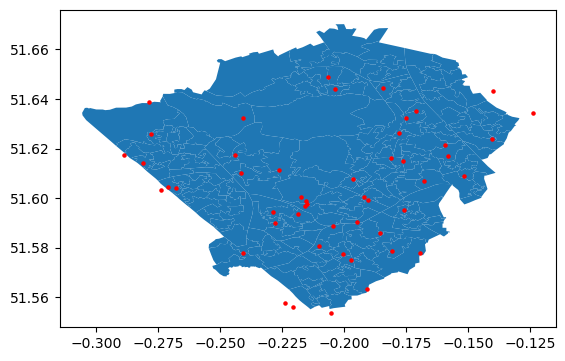

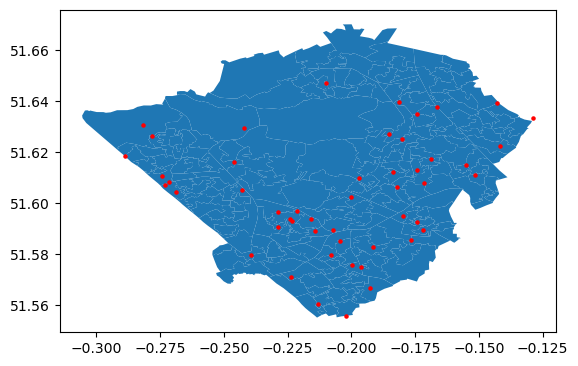

In [25]:
# testing KDE

# KDE predicts Longitude and Latitude so must be converted to LSOA for comparisons

placement_gaussiankde = kde_gaussian.sample(officer_count, random_state=2023)
placement_tophatkde = kde_tophat.sample(officer_count, random_state=2023)

from shapely.geometry import shape, Point
import geopandas as gpd
import json

gdf = gpd.read_file('barnet_LSOA.geojson')                
base = gdf.plot()
gdfpoints1 = gpd.GeoDataFrame(geometry=gpd.points_from_xy(
    placement_gaussiankde[:,1], placement_gaussiankde[:,0]))
gdfpoints1.plot(ax=base, marker='o', color='red', markersize=5);

base2 = gdf.plot()
gdfpoints1 = gpd.GeoDataFrame(geometry=gpd.points_from_xy(
    placement_tophatkde[:,1], placement_tophatkde[:,0]))
gdfpoints1.plot(ax=base2, marker='o', color='red', markersize=5);


In [26]:

with open('barnet_LSOA.geojson') as f:
    js_lsoa = json.load(f)
df_geo_lsoa = gpd.read_file('barnet_LSOA.geojson')

    
def longlat_to_LSOA(longlat: np.array):
    lsoas = []
    
    df = gpd.points_from_xy(placement_gaussiankde[:,1], placement_gaussiankde[:,0])
    for point in df:
        found_lsoa = None
        for feature in js_lsoa['features']:
            polygon = shape(feature['geometry'])
            if polygon.contains(point):
                found_lsoa = feature["properties"]["LSOA11CD"]
                break
        
        # in this case the point was placed outside of Barnet
        # place the point in the closest LSOA
        if found_lsoa == None:
            closest_index = df_geo_lsoa.geometry.distance(point).sort_values().index[0]
            found_lsoa = df_geo_lsoa.iloc[closest_index]["LSOA11CD"]
            
        lsoas.append(found_lsoa)
        
        
    return lsoas

lsoas_kde_gaussian = longlat_to_LSOA(placement_gaussiankde)
lsoas_kde_tophat = longlat_to_LSOA(placement_tophatkde)

C:\Users\dorus_000\AppData\Local\Temp\ipykernel_9452\1525007693.py:21: UserWarning:

Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [27]:

def KDE_to_placements(kde):
    placements = kde.sample(officer_count, random_state=2023)
    lsoas = longlat_to_LSOA(placements)
    
    df_temp_placement = pd.DataFrame(columns=officer_placements.columns)
    s = {}
    counts = pd.DataFrame(lsoas).value_counts().to_dict()
    for d in counts:
        s[d[0]] = counts[d]
    for lsoa in officer_placements.columns:
        if not lsoa in s:
            s[lsoa] = 0
    return s

officer_placements.loc["Kenel Density - gaussian"] = KDE_to_placements(kde_gaussian)
officer_placements.loc["Kenel Density - tophat"] = KDE_to_placements(kde_tophat)
officer_placements

C:\Users\dorus_000\AppData\Local\Temp\ipykernel_9452\1525007693.py:21: UserWarning:

Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\dorus_000\AppData\Local\Temp\ipykernel_9452\1525007693.py:21: UserWarning:

Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




LSOA                      E01000115  E01000116  E01000117  E01000118  \
VAR - argmax                      0          0          1          0   
VAR - Proportional                0          0          0          0   
Kenel Density - gaussian          0          0          0          0   
Kenel Density - tophat            0          0          0          0   

LSOA                      E01000119  E01000120  E01000121  E01000122  \
VAR - argmax                      0          0          0          0   
VAR - Proportional                0          0          0          0   
Kenel Density - gaussian          1          0          0          0   
Kenel Density - tophat            1          0          0          0   

LSOA                      E01000123  E01000124  ...  E01000317  E01000318  \
VAR - argmax                      0          1  ...          0          0   
VAR - Proportional                0          2  ...          0          0   
Kenel Density - gaussian          1          0  ...          0          0   
Kenel Density - tophat            1          0  ...          0          0   

LSOA                      E01000319  E01000320  E01000321  E01000322  \
VAR - argmax                      0          1          0          0   
VAR - Proportional                0          0          0          0   
Kenel Density - gaussian          0          0          0          0   
Kenel Density - tophat            0          0          0          0   

LSOA                      E01000323  E01000324  E01033572  E01033573  
VAR - argmax                      0          0          0          1  
VAR - Proportional                0          0          0          0  
Kenel Density - gaussian          1          0          0          0  
Kenel Density - tophat            1          0          0          0  

[4 rows x 211 columns]

In [28]:
officer_placements.T.sum()

VAR - argmax                50
VAR - Proportional          50
Kenel Density - gaussian    50
Kenel Density - tophat      50
dtype: int64